In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [80]:
data = pd.read_csv('Admission_Predict.csv')

In [81]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [82]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [83]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

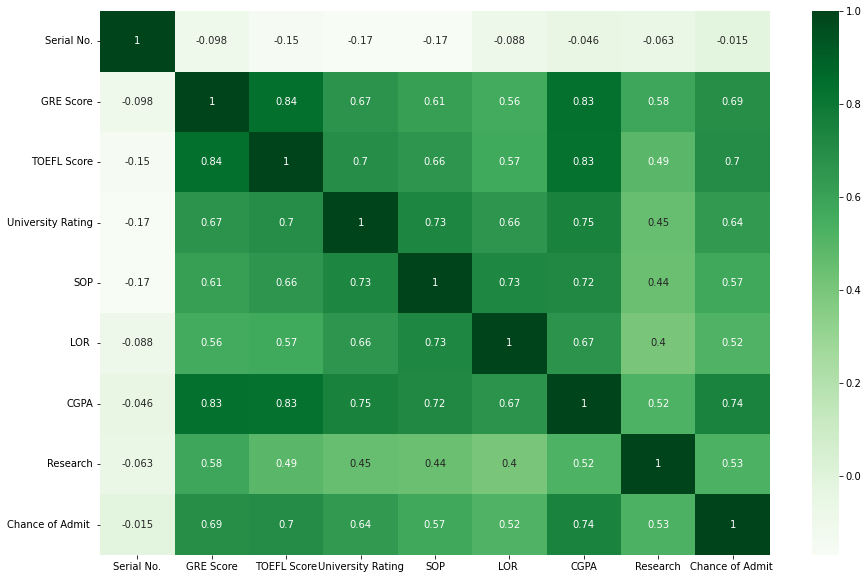

In [104]:
plt.figure(figsize=(15,10))
sb.heatmap(data.corr(),cmap="Greens",annot=True)
plt.show()

In [85]:
data['University Rating'].unique() #label encoding

array([4, 3, 2, 5, 1])

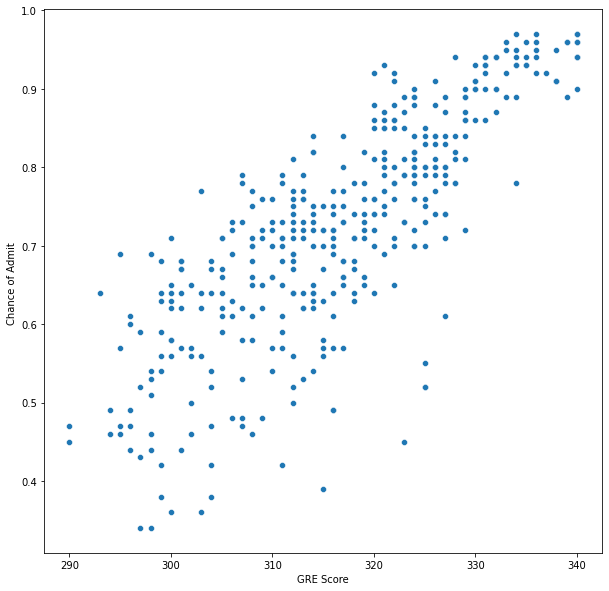

In [86]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=data['GRE Score'],y=data['Chance of Admit '])
plt.show()

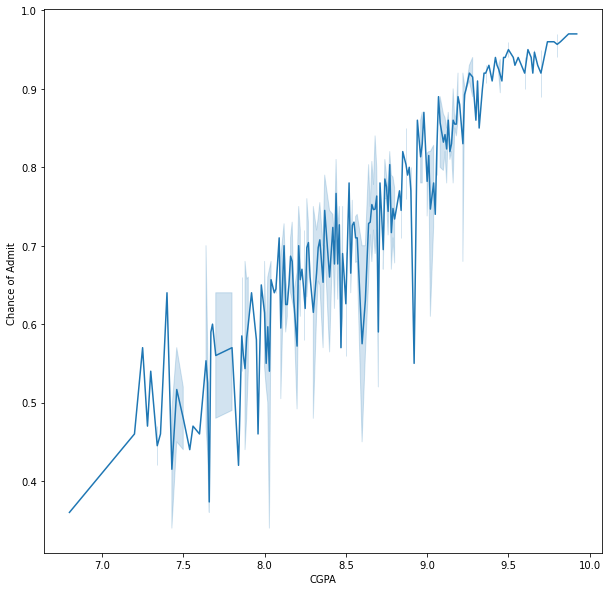

In [87]:
plt.figure(figsize=(10,10))
sb.lineplot(x=data['CGPA'],y=data['Chance of Admit '])
plt.show()

In [88]:
data.loc[data['Chance of Admit ']>=0.8,'Chance of Admit '] = 1
data.loc[data['Chance of Admit ']<0.8,'Chance of Admit '] = 0

In [89]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,precision_score,recall_score,r2_score
from sklearn import tree

In [91]:
X= data.drop(columns=['Serial No.','Chance of Admit '],axis =1)
y = data['Chance of Admit ']

In [92]:
X.shape

(400, 7)

In [93]:
y.shape

(400,)

In [94]:
model = tree.DecisionTreeClassifier()

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #data-preparation

In [106]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.400390625, 0.9545454545454546, 'X[5] <= 8.93\ngini = 0.43\nsamples = 300\nvalue = [206, 94]'),
 Text(0.171875, 0.8636363636363636, 'X[5] <= 8.63\ngini = 0.126\nsamples = 208\nvalue = [194, 14]'),
 Text(0.09375, 0.7727272727272727, 'X[4] <= 1.75\ngini = 0.013\nsamples = 148\nvalue = [147, 1]'),
 Text(0.0625, 0.6818181818181818, 'X[1] <= 106.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.03125, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.09375, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.6818181818181818, 'gini = 0.0\nsamples = 142\nvalue = [142, 0]'),
 Text(0.25, 0.7727272727272727, 'X[6] <= 0.5\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(0.1875, 0.6818181818181818, 'X[0] <= 325.5\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.15625, 0.5909090909090909, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.21875, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3125

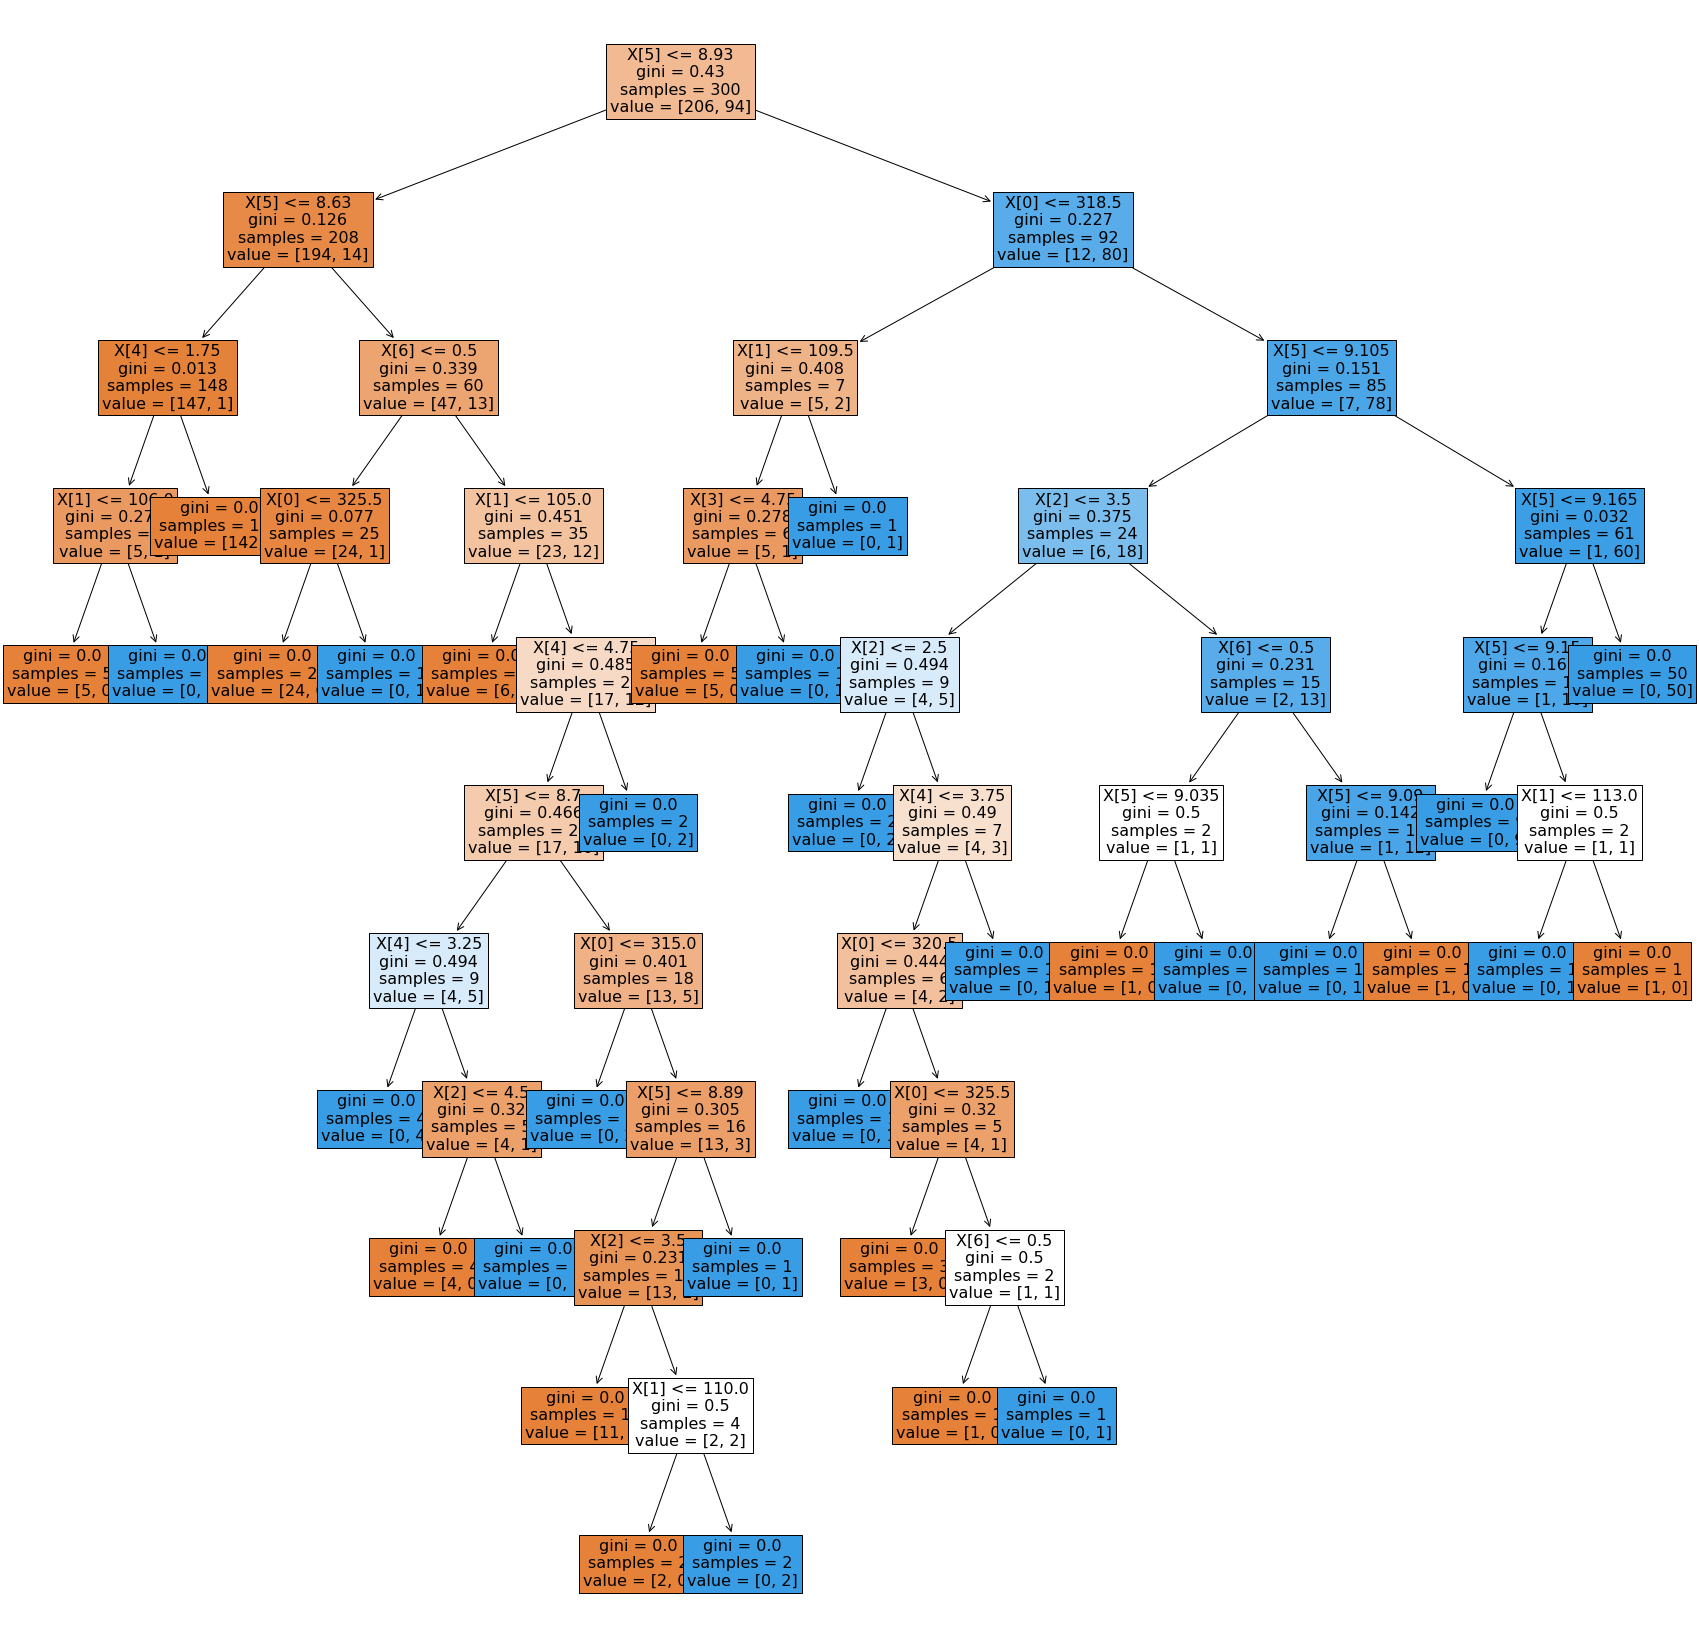

In [97]:
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=True, fontsize=16)

In [98]:
y_pred = model.predict(X_test)

In [99]:
compare = pd.DataFrame(X_test)
compare['Y_test'] = y_test
compare['Y_pred'] = y_pred
compare

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Y_test,Y_pred
209,301,104,3,3.5,4.0,8.12,1,0.0,0.0
280,311,102,3,4.5,4.0,8.64,1,0.0,0.0
33,340,114,5,4.0,4.0,9.60,1,1.0,1.0
210,325,108,4,4.5,4.0,9.06,1,0.0,1.0
93,301,97,2,3.0,3.0,7.88,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...
314,305,105,2,3.0,4.0,8.13,0,0.0,0.0
373,321,109,3,3.0,3.0,8.54,1,0.0,0.0
380,322,104,3,3.5,4.0,8.84,1,0.0,0.0
239,299,100,1,1.5,2.0,7.89,0,0.0,0.0


In [100]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[64,  2],
       [ 6, 28]])

<AxesSubplot:>

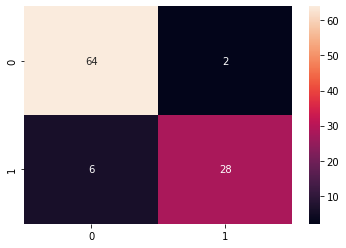

In [101]:
sb.heatmap(confusion,annot=True)

In [102]:
print("Model Accuracy Score :" ,accuracy_score(y_test, y_pred)*100)
print("Model Mean Absolute Error : ",mean_absolute_error(y_test,y_pred)*100)
print("Model Mean Sqaured Error : ",mean_squared_error(y_test,y_pred)*100)
print("Model Precision Score : ",precision_score(y_test,y_pred)*100)
print("Model Recall Score : ",recall_score(y_test,y_pred)*100)
print("Model R2 Score : ",r2_score(y_test,y_pred)*100)

Model Accuracy Score : 92.0
Model Mean Absolute Error :  8.0
Model Mean Sqaured Error :  8.0
Model Precision Score :  93.33333333333333
Model Recall Score :  82.35294117647058
Model R2 Score :  64.349376114082
